In [71]:
import numpy as np
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper,BravyiKitaevMapper
from qiskit.circuit import QuantumCircuit, ParameterVector, Parameter

In [52]:
n = 4
N = 2*n
t=1
mu=1.5
U=3

In [53]:
op = FermionicOp(
    {
        "+_0 -_0": 1.0,
        "+_1 -_1": -1.0,
    },
    num_spin_orbitals=2,
)

In [54]:
print(op)

Fermionic Operator
number spin orbitals=2, number terms=2
  1.0 * ( +_0 -_0 )
+ -1.0 * ( +_1 -_1 )


In [55]:
def qOp(i,j,N=8):
    return FermionicOp(
    {
        "+_{i} -_{j}".format(i=i%N,j=j%N): 1.0,
    },
    num_spin_orbitals=N,
)

In [56]:
t_term = 0
mu_term =0
U_term =0
for i in range(n):
    t_term+= qOp(2*i,2*i+2) + qOp(2*i+2,2*i) + qOp(2*i+1,2*i+3) + qOp(2*i+3,2*i+1) 
    mu_term += qOp(2*i,2*i) + qOp(2*i+1,2*i+1)
    U_term += (qOp(2*i,2*i) @ qOp(2*i+1, 2*i+1))
H = U * U_term - mu * mu_term - t * t_term

print(H)

Fermionic Operator
number spin orbitals=8, number terms=28
  3.0 * ( +_0 -_0 +_1 -_1 )
+ 3.0 * ( +_2 -_2 +_3 -_3 )
+ 3.0 * ( +_4 -_4 +_5 -_5 )
+ 3.0 * ( +_6 -_6 +_7 -_7 )
+ -1.5 * ( +_6 -_6 )
+ -1.5 * ( +_2 -_2 )
+ -1.5 * ( +_0 -_0 )
+ -1.5 * ( +_7 -_7 )
+ -1.5 * ( +_5 -_5 )
+ -1.5 * ( +_4 -_4 )
+ -1.5 * ( +_1 -_1 )
+ -1.5 * ( +_3 -_3 )
+ -1.0 * ( +_3 -_1 )
+ -1.0 * ( +_5 -_7 )
+ -1.0 * ( +_7 -_5 )
+ -1.0 * ( +_7 -_1 )
+ -1.0 * ( +_6 -_0 )
+ -1.0 * ( +_5 -_3 )
+ -1.0 * ( +_0 -_2 )
+ -1.0 * ( +_1 -_3 )
+ -1.0 * ( +_2 -_4 )
+ -1.0 * ( +_2 -_0 )
+ -1.0 * ( +_3 -_5 )
+ -1.0 * ( +_4 -_2 )
+ -1.0 * ( +_1 -_7 )
+ -1.0 * ( +_4 -_6 )
+ -1.0 * ( +_6 -_4 )
+ -1.0 * ( +_0 -_6 )


In [57]:
mapper = JordanWignerMapper()
qubit_jw_op = mapper.map(H)
print(qubit_jw_op)

SparsePauliOp(['IIIIIIII', 'IIIIIIZZ', 'IIIIZZII', 'IIZZIIII', 'ZZIIIIII', 'IIIIXZXI', 'IIIIYZYI', 'YZYIIIII', 'XZXIIIII', 'XZZZZZXI', 'YZZZZZYI', 'IXZZZZZX', 'IYZZZZZY', 'IIXZXIII', 'IIYZYIII', 'IIIIIYZY', 'IIIIIXZX', 'IIIYZYII', 'IIIXZXII', 'IYZYIIII', 'IXZXIIII'],
              coeffs=[-3.  +0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j,  0.75+0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j, -0.5 +0.j,
 -0.5 +0.j, -0.5 +0.j, -0.5 +0.j])


In [58]:
from qiskit.algorithms import NumPyEigensolver
from qiskit.visualization import plot_histogram
from qiskit.opflow.primitive_ops import PauliSumOp, PauliOp

# find the first three (k=3) eigenvalues
exact_solver = NumPyEigensolver(k=3)
qubit_jw_op1 = PauliSumOp(qubit_jw_op)
exact_result = exact_solver.compute_eigenvalues(qubit_jw_op1)

# Save ground state energy for later
gs_energy = np.round(exact_result.eigenvalues[0], 4)

/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_8243/3524453298.py:6: DeprecationWarning: The class ``qiskit.algorithms.eigen_solvers.numpy_eigen_solver.NumPyEigensolver`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the class ``qiskit.algorithms.eigensolvers.NumPyEigensolver``. See https://qisk.it/algo_migration for a migration guide.
  exact_solver = NumPyEigensolver(k=3)
/var/folders/n_/1wl7_2l52y3g1_82hvk9hw3h0000gn/T/ipykernel_8243/3524453298.py:7: DeprecationWarning: The class ``qiskit.opflow.primitive_ops.pauli_sum_op.PauliSumOp`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/opflow_migration.
  qubit_jw_op1 = PauliSumOp(qubit_jw_op)


In [59]:
print(gs_energy)

-8.4244


In [106]:
from qiskit_algorithms import VQE
from qiskit.primitives import Estimator
from qiskit.circuit.library import EfficientSU2
from qiskit_algorithms.optimizers import SPSA, COBYLA, QNSPSA

n = qubit_jw_op.num_qubits
est = Estimator()
ansatz = EfficientSU2(n)
optimizer = SPSA(maxiter = 500)
intermediate_info = []
params_info = []
def callback(eval_count,params,value,meta):
        intermediate_info.append(value)
        params_info.append(params)

vqe = VQE(est,ansatz,optimizer,callback = callback)


In [61]:
eigen = vqe.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue

In [62]:
print(eigen)

-7.88254495799667


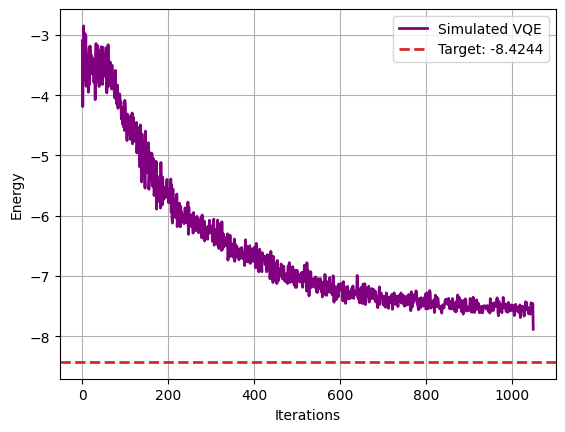

In [63]:
import matplotlib.pyplot as plt
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()

# Ansatz From: https://arxiv.org/pdf/2112.14077

In [101]:
from qiskit.circuit.library import SwapGate
from scipy.linalg import expm
from qiskit.quantum_info.operators import Operator
from qiskit.extensions import HamiltonianGate

#eZZ gate
theta = 0.7809
Smat = SwapGate().to_matrix()
Sop = Operator(SwapGate())
#print(Sop)
#expS = expm(1j*Smat)
#def expSt(t):
#    return np.power(expS,t)

def eSwap(circ,i,j,t):
    eSt = HamiltonianGate(Sop,t,label = "eSwap")
    circ.append(eSt,[i,j])


def eZZ(circ,i,j,t):
    circ.cx(i,j)
    circ.rz(t,j)
    circ.cx(i,j)

def fij(circ,i,j,t):
    eSwap(circ,i,j,t)
    circ.cp(t,i,j)

def efSwap(circ,i,j,t):
    for k in range(j-1,i,-1):
        circ.cz(j,k)
    fij(circ,i,j,t)
    for k in range(i+1,j,1):
        circ.cz(j,k)

def hopping(circ,r):
    n = circ.num_qubits
    t_s = ParameterVector("t_h{r}".format(r=r),length = n)
    for i in range(n):
        efSwap(circ,i,(i+2)%n,t_s[i])

def interaction(circ,r):
    n = circ.num_qubits
    t_s = ParameterVector("t_i{r}".format(r=r),length = n//2)
    for i in range(0,n,2):
        eZZ(circ,i,i+1,t_s[i//2])

def start(circ):
    n = circ.num_qubits
    for i in range(0,n,2):
        circ.x(i)
        circ.h(i+1)
        circ.cx(i,i+1)

def hopint(circ,reps = 3):
    for r in range(reps):
        hopping(circ,r)
        interaction(circ,r)
    

In [102]:
circ = QuantumCircuit(N)
start(circ)
hopint(circ)
#circ.draw(style = "mpl")
print(circ.parameters)

ParameterView([ParameterVectorElement(t_h0[0]), ParameterVectorElement(t_h0[1]), ParameterVectorElement(t_h0[2]), ParameterVectorElement(t_h0[3]), ParameterVectorElement(t_h0[4]), ParameterVectorElement(t_h0[5]), ParameterVectorElement(t_h0[6]), ParameterVectorElement(t_h0[7]), ParameterVectorElement(t_h1[0]), ParameterVectorElement(t_h1[1]), ParameterVectorElement(t_h1[2]), ParameterVectorElement(t_h1[3]), ParameterVectorElement(t_h1[4]), ParameterVectorElement(t_h1[5]), ParameterVectorElement(t_h1[6]), ParameterVectorElement(t_h1[7]), ParameterVectorElement(t_h2[0]), ParameterVectorElement(t_h2[1]), ParameterVectorElement(t_h2[2]), ParameterVectorElement(t_h2[3]), ParameterVectorElement(t_h2[4]), ParameterVectorElement(t_h2[5]), ParameterVectorElement(t_h2[6]), ParameterVectorElement(t_h2[7]), ParameterVectorElement(t_i0[0]), ParameterVectorElement(t_i0[1]), ParameterVectorElement(t_i0[2]), ParameterVectorElement(t_i0[3]), ParameterVectorElement(t_i1[0]), ParameterVectorElement(t_i1[

In [103]:
ans1 = circ
print(ans1.parameters)

ParameterView([ParameterVectorElement(t_h0[0]), ParameterVectorElement(t_h0[1]), ParameterVectorElement(t_h0[2]), ParameterVectorElement(t_h0[3]), ParameterVectorElement(t_h0[4]), ParameterVectorElement(t_h0[5]), ParameterVectorElement(t_h0[6]), ParameterVectorElement(t_h0[7]), ParameterVectorElement(t_h1[0]), ParameterVectorElement(t_h1[1]), ParameterVectorElement(t_h1[2]), ParameterVectorElement(t_h1[3]), ParameterVectorElement(t_h1[4]), ParameterVectorElement(t_h1[5]), ParameterVectorElement(t_h1[6]), ParameterVectorElement(t_h1[7]), ParameterVectorElement(t_h2[0]), ParameterVectorElement(t_h2[1]), ParameterVectorElement(t_h2[2]), ParameterVectorElement(t_h2[3]), ParameterVectorElement(t_h2[4]), ParameterVectorElement(t_h2[5]), ParameterVectorElement(t_h2[6]), ParameterVectorElement(t_h2[7]), ParameterVectorElement(t_i0[0]), ParameterVectorElement(t_i0[1]), ParameterVectorElement(t_i0[2]), ParameterVectorElement(t_i0[3]), ParameterVectorElement(t_i1[0]), ParameterVectorElement(t_i1[

In [107]:
optimizer = SPSA(maxiter = 500)
vqe1 = VQE(est,ans1,optimizer,callback = callback)
intermediate_info = []
params_info = []
eigen = vqe1.compute_minimum_eigenvalue(qubit_jw_op).eigenvalue
print(eigen)
print(params_info[0])
print(params_info[1])

-4.724284978455656
[1.4419678699680685, 3.178320137865737, -2.7848942849873746, -4.606443749253704, 3.775406493143863, 5.758785076015541, 3.081213092430631, -3.032494979921858, -0.033810282250106016, 0.27831916938027507, -0.3712995248744651, 5.682276053938474, -3.4017385886600464, -1.8192991433785923, -3.5546078888823196, -4.893418031957477, 4.013425986953261, -1.5660623283643627, 2.6090516837765856, 2.9146687303244176, 3.5664466748907797, -0.24008045563959096, 3.7082761776017774, 1.6178001343257347, 4.921378306548456, -2.190414906198967, -0.06390494092312266, -6.4580755276339525, -5.909148523110771, -0.8782864268169088, -3.068961307341959, 0.9149565608000765, 1.3155221414941327, 4.44052963027766, -6.000791810483323, 5.460039695783027]
[1.8419678699680684, 3.578320137865737, -2.384894284987374, -4.206443749253704, 3.3754064931438625, 6.158785076015541, 3.4812130924306315, -3.4324949799218585, -0.43381028225010604, 0.678319169380275, 0.02870047512553492, 6.082276053938474, -3.8017385886

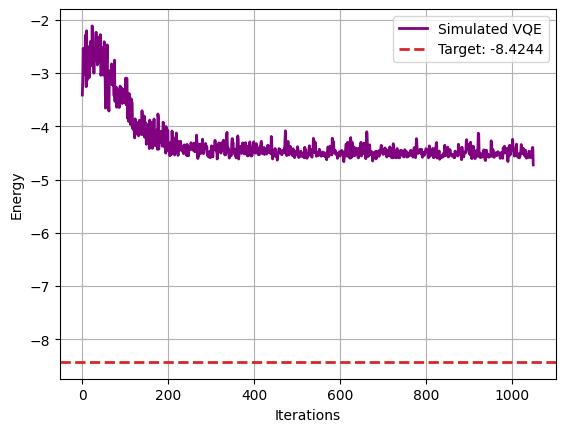

In [108]:
plt.plot(intermediate_info, color='purple', lw=2, label='Simulated VQE')
plt.ylabel('Energy')
plt.xlabel('Iterations')
# Exact ground state energy value
plt.axhline(y=gs_energy, color="tab:red", ls="--", lw=2, label="Target: " + str(gs_energy))
plt.legend()
plt.grid()
plt.show()